## Data Cleaning and Preprocessing 

In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [422]:
# import dataset
df = pd.read_csv("C:/Users/dompr/Downloads/dataset/data/bank.csv", header=0, delimiter=";", quotechar='"')
pd.set_option('display.max_columns', None)

In [423]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [424]:
df.shape

(4521, 17)

In [425]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Observation:
1. No missing value
2. outliers in duration, campaign, balance, pdays

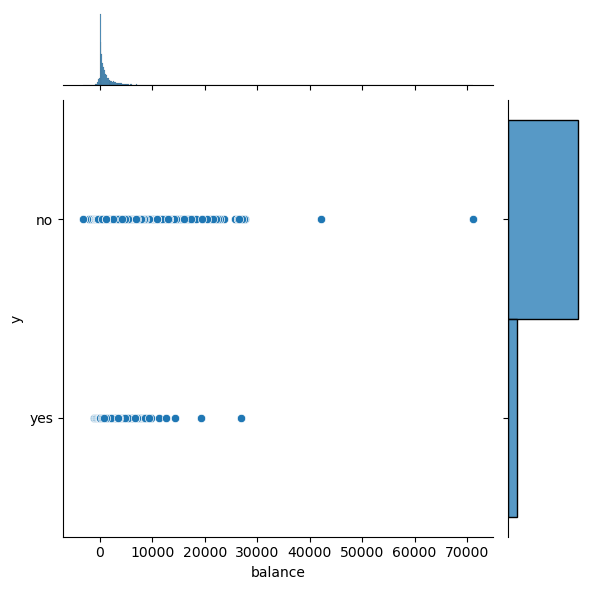

In [427]:
sns.jointplot(x="balance", y="y",data=df)

In [428]:
uv = np.percentile(df["balance"], 99)

In [429]:
print(uv)

14194.600000000024


In [430]:
df.loc[df["balance"]> uv, "balance"] = uv

C:\Users\dompr\AppData\Local\Temp\ipykernel_10492\3455666716.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14194.600000000024' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["balance"]> uv, "balance"] = uv


In [431]:
print(df["balance"].describe())

count     4521.000000
mean      1352.030878
std       2428.934930
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      14194.600000
Name: balance, dtype: float64


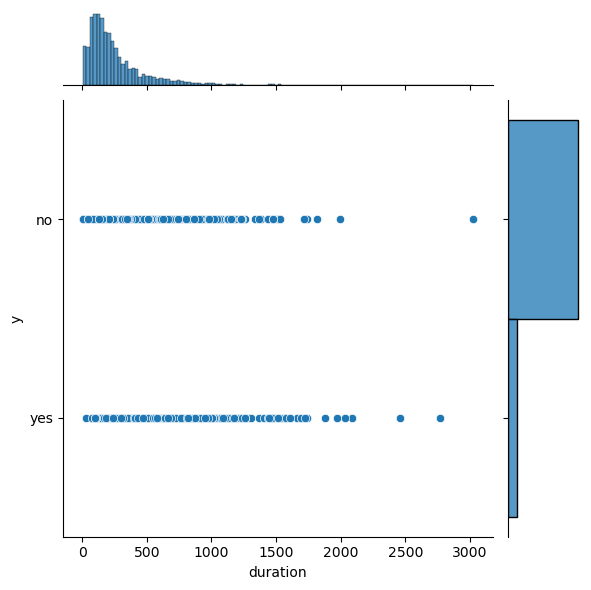

In [432]:
sns.jointplot(x="duration", y="y", data=df)

In [433]:
uv = np.percentile(df["duration"], 99)

In [434]:
df.loc[df["duration"]> uv, "duration"] = uv

In [435]:
print(df["duration"].describe())

count    4521.000000
mean      260.183588
std       239.270924
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      1259.000000
Name: duration, dtype: float64


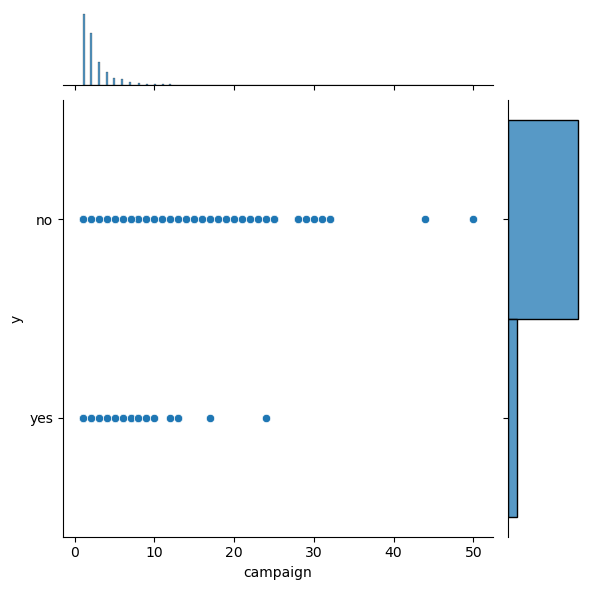

In [436]:
sns.jointplot(x="campaign", y="y", data=df)

In [437]:
uv = np.percentile(df["campaign"], 99)

In [438]:
print(uv)

16.0


In [439]:
df.loc[df["campaign"] > uv, "campaign"] = uv

In [440]:
print(df["campaign"].describe())

count    4521.000000
mean        2.725061
std         2.626585
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: campaign, dtype: float64


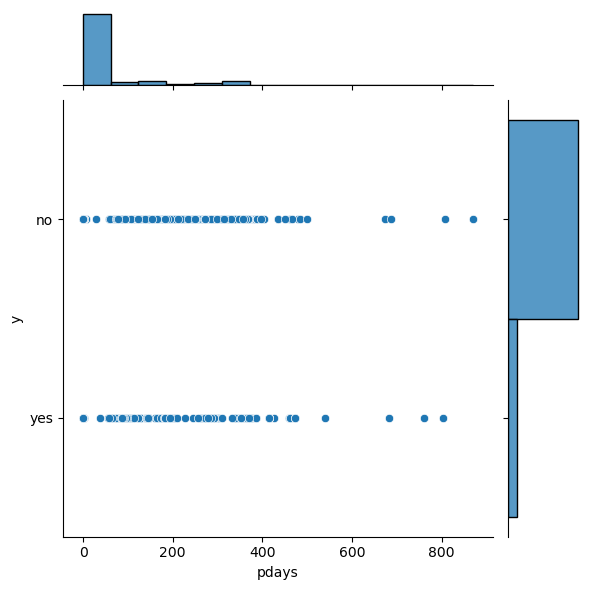

In [441]:
sns.jointplot(x="pdays", y="y", data=df)

In [442]:
uv = np.percentile(df["pdays"], 99)

In [443]:
print(uv)

370.0


In [444]:
df.loc[df["pdays"] > uv, "pdays"] = uv

In [445]:
print(df["pdays"].describe())

count    4521.000000
mean       38.784119
std        95.396470
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       370.000000
Name: pdays, dtype: float64


### Explorartory Analysis on the Categorical variables

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


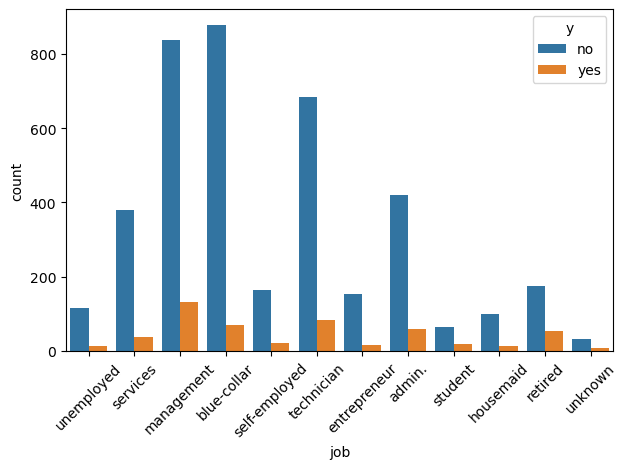

In [448]:
sns.countplot(x="job", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

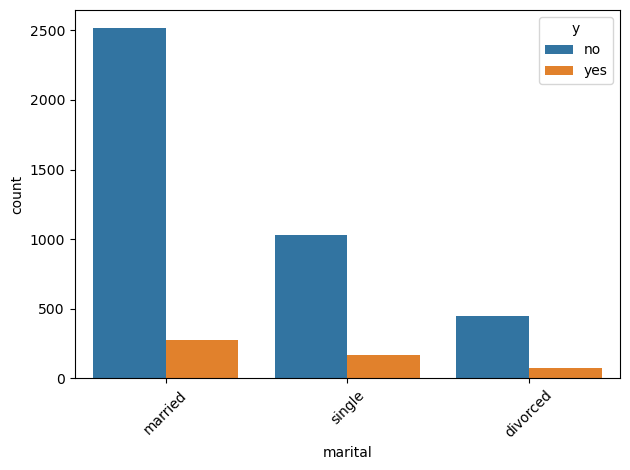

In [449]:
sns.countplot(x="marital", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

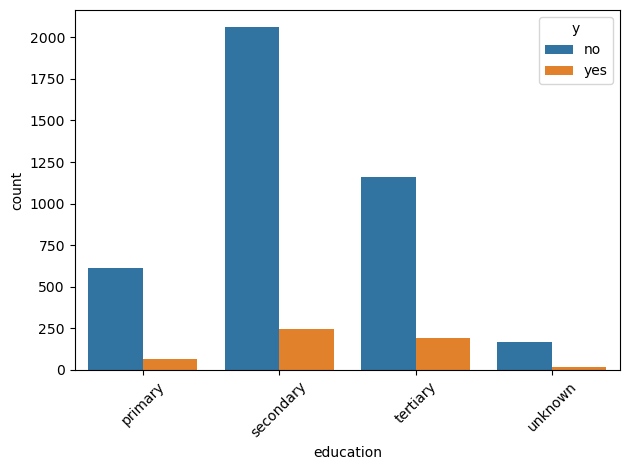

In [450]:
sns.countplot(x="education", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

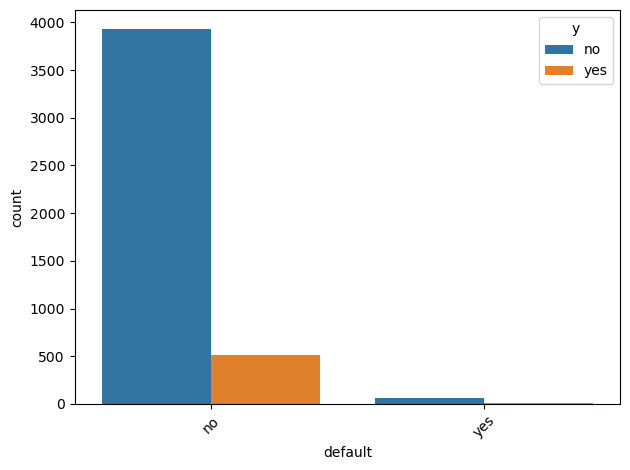

In [451]:
sns.countplot(x="default", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

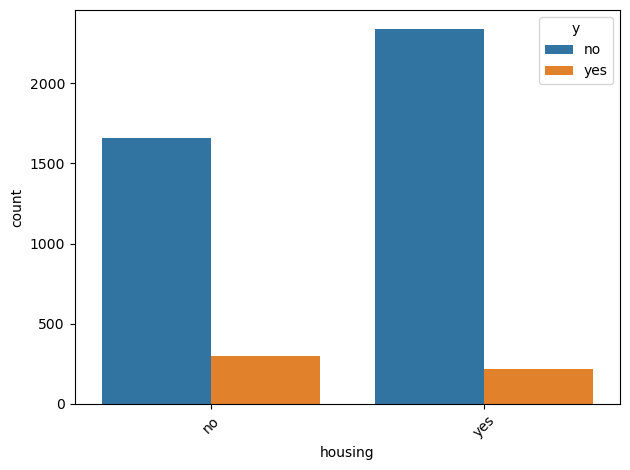

In [452]:
sns.countplot(x="housing", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

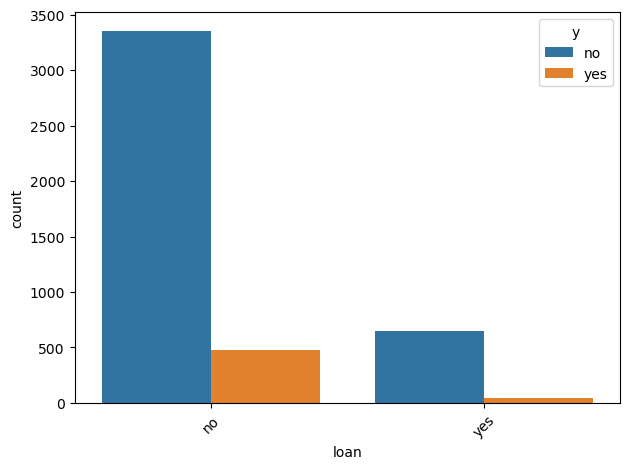

In [453]:
sns.countplot(x="loan", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

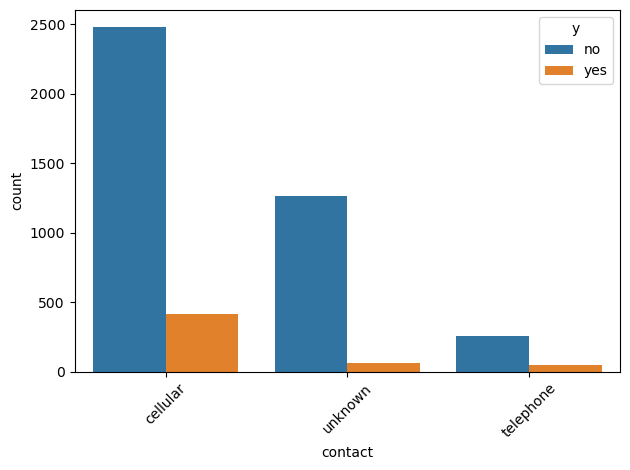

In [454]:
sns.countplot(x="contact", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

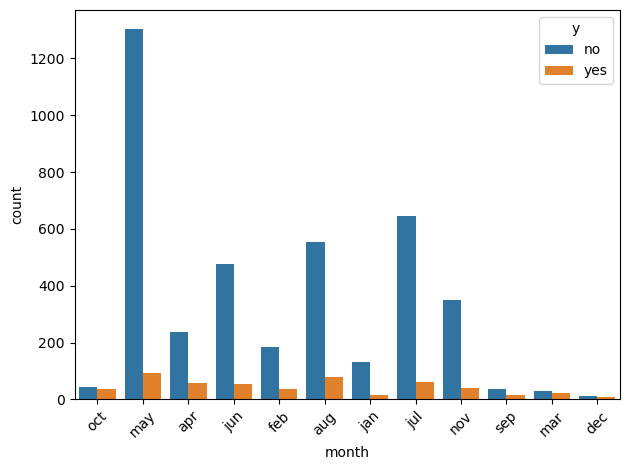

In [455]:
sns.countplot(x="month", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

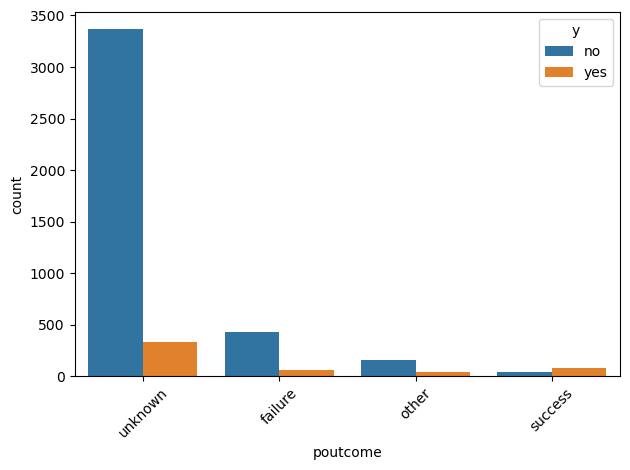

In [456]:
sns.countplot(x="poutcome", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

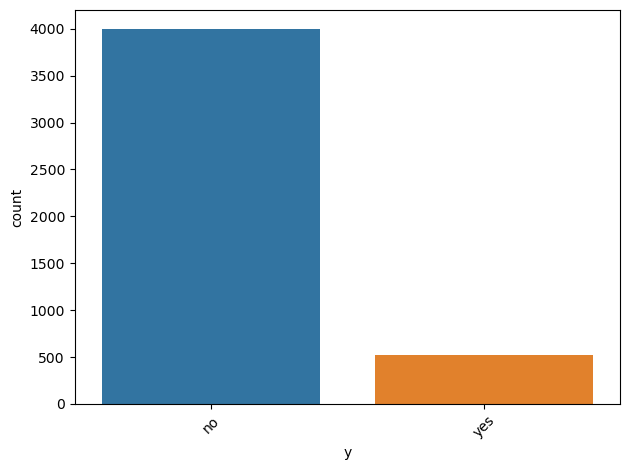

In [457]:
sns.countplot(x="y", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

###### Observation:

In [459]:
df = pd.get_dummies(df, drop_first=True).astype(int)

In [460]:
df.rename(columns={'y_yes': 'y'}, inplace=True)

In [462]:
# split features
X = df.drop("y", axis=1)
y = df["y"]

In [463]:
df["y"].value_counts(normalize=True)

y
0    0.88476
1    0.11524
Name: proportion, dtype: float64

In [464]:
df["y"]=df["y"].map({"no": 0, "yes": 1})

In [465]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [467]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

logreg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [514]:
# interpreting model coefficient from original model before trained (X_train)
feature_names = X_train.columns

In [516]:
# coefficient of trained model
coefficients = logreg.coef_[0]

In [518]:
# convert the coefficient into odd ratio
odd_ratios = np.exp(coefficients)

In [520]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odd ratio": odd_ratios
})

In [522]:
print(coef_df)

                Feature  Coefficient  Odd ratio
0                   age    -0.046363   0.954695
1               balance     0.067322   1.069640
2                   day     0.028838   1.029258
3              duration     1.458293   4.298615
4              campaign    -0.326357   0.721548
5                 pdays    -0.187455   0.829067
6              previous    -0.048653   0.952512
7       job_blue-collar    -0.316977   0.728348
8      job_entrepreneur    -0.047643   0.953474
9         job_housemaid    -0.117275   0.889340
10       job_management    -0.075321   0.927446
11          job_retired     0.080873   1.084234
12    job_self-employed    -0.114550   0.891768
13         job_services    -0.188846   0.827914
14          job_student     0.051671   1.053030
15       job_technician    -0.187118   0.829346
16       job_unemployed    -0.157802   0.854019
17          job_unknown     0.023352   1.023626
18      marital_married    -0.192509   0.824887
19       marital_single    -0.056735   0

In [524]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.96      0.84      0.89       801
         Yes       0.37      0.75      0.50       104

    accuracy                           0.83       905
   macro avg       0.67      0.79      0.70       905
weighted avg       0.89      0.83      0.85       905

